In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('C:\\Users\\prach\\PycharmProjects\\PredictingNumberByImage\\MnistData\\mnist_train.csv')

In [5]:
df.shape

(60000, 785)

In [6]:
df.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [7]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = df.values
print(data.shape)
print(type(data))

(60000, 785)
<class 'numpy.ndarray'>


In [9]:
X = data[:,1:]
Y = data[:,0]

In [10]:
X.shape , Y.shape

((60000, 784), (60000,))

In [11]:
# Now want to split this data for traing and testing
split = int(0.8 * X.shape[0])
print(split)

X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

48000
(48000, 784)
(48000,)
(12000, 784)
(12000,)


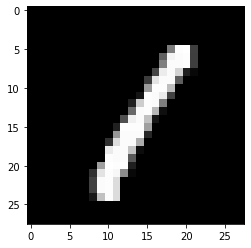

1


In [12]:
# Visualize some samples
def drawImg(sample) :
    img= sample.reshape((28,28))
    plt.imshow(img , cmap = 'gray')
    plt.show()

drawImg(X_train[3])
print(Y_train[3])

In [13]:
def dist(x1,x2) :
    return np.sqrt(sum((x1 - x2) ** 2))
def knn(X , Y , queryPoint , k = 5) :
    vals = []
    m = X.shape[0]
    for i in range(m) :
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))

    vals = sorted(vals)
    vals = vals[:k]


    vals = np.array(vals)

    # print(vals)
    new_vals = np.unique(vals[:,1] , return_counts = True)
    # print(new_vals)

    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred

def knnMain(X , Y , queryPoint , k = 5) :
    preds = []
    for i in range(queryPoint.shape[0]) :
        pred = knn(X , Y , queryPoint[i] , k = 5)
        preds.append(pred)
    return preds

In [14]:
pred = knn(X_train , Y_train , X_test[0])

In [15]:
pred

4.0

In [16]:
Y_test[0]

4

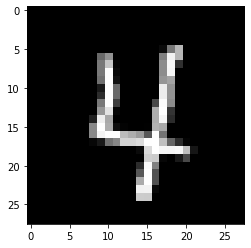

In [17]:
drawImg(X_test[0])

In [18]:
pred = knn(X_train , Y_train , X_test[1])

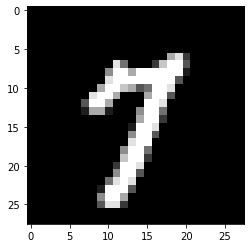

In [19]:
drawImg(X_test[1])

In [20]:
# Write one method which computes accuracy of Knn over the test set
# finding predictions for 10 test points
pred = knnMain(X_train , Y_train , X_test[:10,:])
print(pred)

[4.0, 7.0, 8.0, 8.0, 5.0, 6.0, 6.0, 8.0, 2.0, 2.0]


In [21]:
X_test.shape[0]

12000

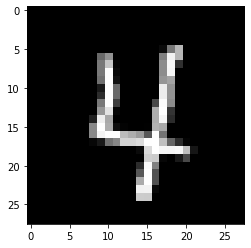

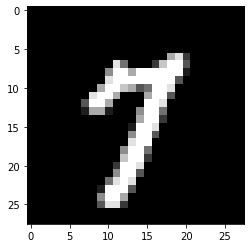

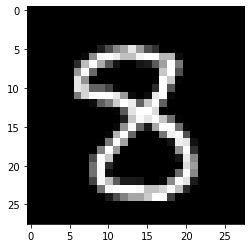

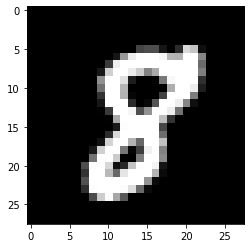

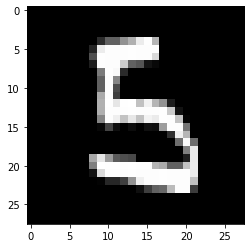

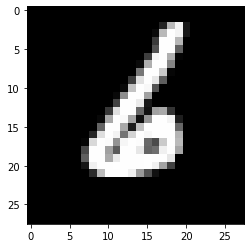

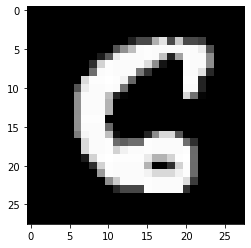

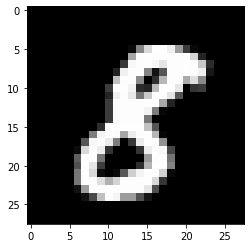

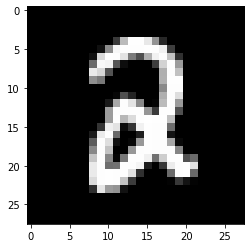

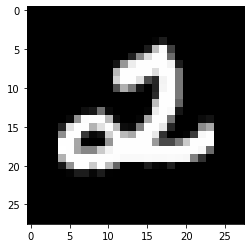

In [22]:
for i in range(10) :
    drawImg(X_test[i])